In [71]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet
import pickle
%matplotlib inline

In [72]:
Orders = pd.read_csv('Orders_1.csv')
Orders.head(1)

,row,order_priority,order_date,order_id,discount,unit_price,order_quantity,sales,shipping_cost,product_base_margin,...,city,postal_code,ship_date,ship_mode,subregion,new_order_date,year_order_date,new_discount,new_margin,profit
0,3689,Medium,28/01/2011,97,3%,3.0,26,75.66,1.0,38.0%,...,Jakarta,NaN,29/01/2011,Regular Air,NaN,2011-01-28,2011,0.03,0.38,26.3


In [73]:
Sales_records = Orders[['sales','order_date']]
Sales_records['order_date'] = pd.to_datetime(Sales_records['order_date'])
Sales_records.sort_values('order_date',ascending=True,inplace=True)
Sales_records = Sales_records.groupby('order_date')['sales'].sum()
Sales_records = Sales_records.reset_index()
Sales_records.head(3)

WARNING - (py.warnings._showwarnmsg) - /Users/Jerry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

WARNING - (py.warnings._showwarnmsg) - /Users/Jerry/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,order_date,sales
0,2010-01-19,111.93
1,2010-02-12,963.30
2,2010-02-26,107.80


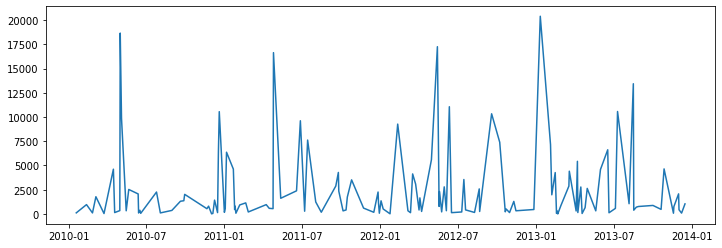

In [74]:
plt.figure(figsize=(12, 4))
plt.plot(Sales_records['order_date'], Sales_records['sales'])
plt.show()

In [75]:
# Prepare for using Prophet,
data = Sales_records[['order_date', 'sales']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

,ds,y
0,2010-01-19,111.93
1,2010-02-12,963.30
2,2010-02-26,107.80
3,2010-03-06,1777.23
4,2010-03-25,43.24


In [76]:
#  Train Model
m = NeuralProphet()
model = m.fit(data, freq='D', epochs=1000) 

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


  0%|          | 0/208 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.22E-01, min: 1.00E+00


  0%|          | 0/208 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.22E-01, min: 1.22E+00


  0%|          | 0/208 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.35E-01, min: 1.82E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.26E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [00:22<00:00, 45.04it/s, SmoothL1Loss=0.0564, MAE=2.48e+3, RMSE=3.35e+3, RegLoss=0]


In [77]:
# Forecast 
future = m.make_future_dataframe(data, periods=3000)
future.head()

,ds,y
0,2013-12-16,None
1,2013-12-17,None
2,2013-12-18,None
3,2013-12-19,None
4,2013-12-20,None


In [78]:
# Start predicting
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2013-12-16,None,2683.332520,NaN,2156.724609,-12.625721,539.233704
1,2013-12-17,None,2235.605469,NaN,2154.185791,88.026909,-6.607271
2,2013-12-18,None,2155.118896,NaN,2151.646729,187.764618,-184.292374
3,2013-12-19,None,2127.678955,NaN,2149.107910,285.994324,-307.423218
4,2013-12-20,None,2127.789062,NaN,2146.568848,382.116760,-400.896484


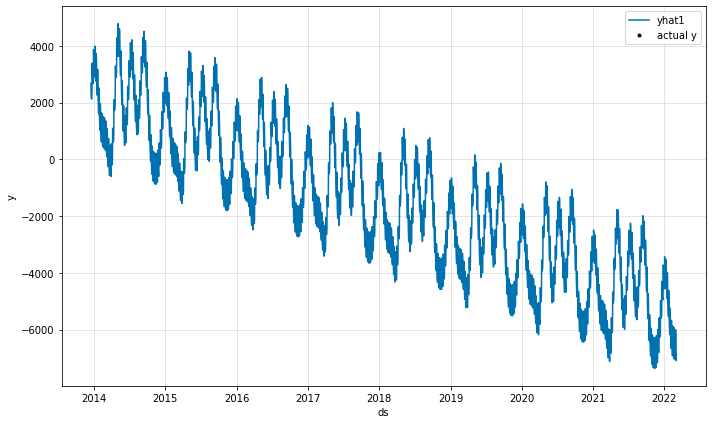

In [79]:
# Visualize prediction 
plot1 = m.plot(forecast)

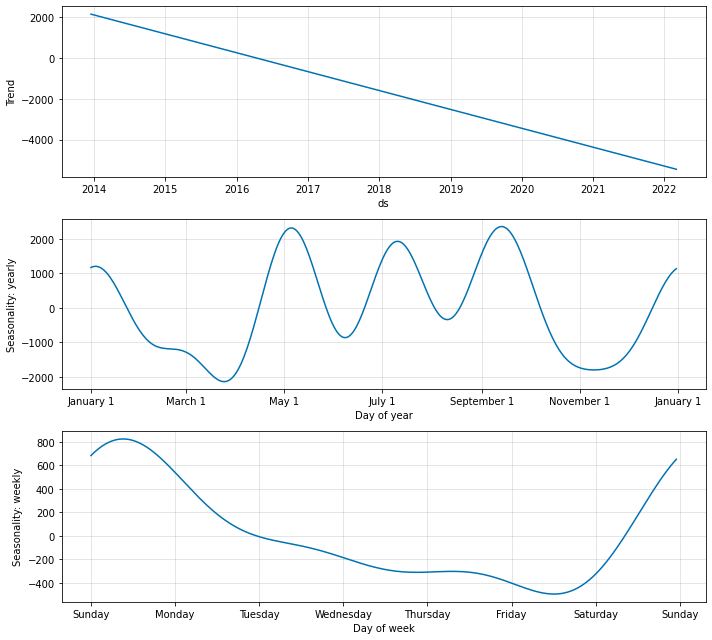

In [80]:
plt2 = m.plot_components(forecast)